# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os




In [0]:

from sklearn.tree import export_graphviz

# 1.1 Reading data

In [0]:
!curl --header "Host: doc-0k-b8-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/folders/1E_8G-TVK8ZGb25OgytJ7NOV98pkKcmmN" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi_nonce=abnv7rph1mepc; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0k-b8-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/u5eqrunmfn6tcqc9hvbhiq3lbsamgkhd/1576137600000/01431468197101903198/01431468197101903198/1aBvtzZJ2_WRrX8j8toIr8E10URWn6qgg?e=download&authuser=0&nonce=abnv7rph1mepc&user=01431468197101903198&hash=3job0ppfggo7rdjab3apco7pt3mghap0" -o "Copy of train_data.csv" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  191M    0  191M    0     0  81.5M      0 --:--:--  0:00:02 --:--:-- 81.5M


In [0]:
!curl --header "Host: doc-0o-b8-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/folders/1E_8G-TVK8ZGb25OgytJ7NOV98pkKcmmN" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi=01431468197101903198|1576137600000|ta2ag6t4rpcb75mpq18acvbhei6cd244; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0o-b8-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/lidcnjdio31js8dtmag7ktp37f2b8f4f/1576137600000/01431468197101903198/01431468197101903198/1NYzoGBgQORqKyXs3T0Lsd_qcPverkM3o?e=download&authuser=0" -o "Copy of resources.csv" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121M    0  121M    0     0  55.7M      0 --:--:--  0:00:02 --:--:-- 55.7M


In [0]:
project_data = pd.read_csv('Copy of train_data.csv')
resource_data = pd.read_csv('Copy of resources.csv')


In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.project_is_approved.value_counts()


Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


1    92706
0    16542
Name: project_is_approved, dtype: int64

In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 preprocessing of project_subject_categories

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039



# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


# 1.3 preprocessing of project_subject_subcategories

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.4 preprocessing of project grade categories

In [0]:
#preprocess project grade category
print(project_data['project_grade_category'].values[0])
print("="*50)
print(project_data['project_grade_category'].values[150])
print("="*50)
print(project_data['project_grade_category'].values[1000])
print("="*50)
print(project_data['project_grade_category'].values[20000])
print("="*50)


project_data['project_grade_category'].value_counts()

Grades PreK-2
Grades 3-5
Grades 3-5
Grades PreK-2


Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [0]:
preprocessed_project_grade_categories= []

for grade_cat in tqdm(project_data["project_grade_category"]):
   
    grade_cat = grade_cat.replace('-', '_')  #Replacing(-) with(_)
    grade_cat = grade_cat.replace('Grades', '') #Removing grades as it is redundant
   
    grad_cat = ' '.join(f for f in grade_cat.split())
    preprocessed_project_grade_categories.append(grad_cat.strip())

100%|██████████| 109248/109248 [00:00<00:00, 595203.66it/s]


In [0]:
print(preprocessed_project_grade_categories[1])
print("="*50)
print(preprocessed_project_grade_categories[50])
print("="*50)
print(preprocessed_project_grade_categories[500])
print("="*50)
print(preprocessed_project_grade_categories[5000])
print("="*50)
print(preprocessed_project_grade_categories[10001])

6_8
PreK_2
9_12
PreK_2
PreK_2


# 1.5 preprocessing of teacher prefix

In [0]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [0]:
def replace_cate(lst):          # Removing (.) in Mrs. 
    return lst.replace('.','')
   

project_data['teacher_prefix']= project_data['teacher_prefix'].astype(str).apply(replace_cate)

In [0]:
preprocessed_teacher_prefix = []

for teach_prefix in tqdm(project_data["teacher_prefix"]):
    
    preprocessed_teacher_prefix.append(teach_prefix.strip())

100%|██████████| 109248/109248 [00:00<00:00, 1807778.10it/s]


In [0]:
print(preprocessed_teacher_prefix[1])
print("="*50)
print(preprocessed_teacher_prefix[50])
print("="*50)
project_data.teacher_prefix.value_counts()

Mr
Mrs


Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
null           3
Name: teacher_prefix, dtype: int64

 # clean titles preprocessing

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
title = decontracted(project_data['project_title'].values[2000])


In [0]:
# stopwords removed first then decontracted function is used

In [0]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = ' '.join(f for f in title.split() if f not in stopwords)
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    
    clean_titles.append(title.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 42622.16it/s]


In [0]:
project_data["clean_titles"] = clean_titles

In [0]:
project_data.drop(['project_title'], axis=1, inplace=True)

# Adding a new feature Number of words in title

In [0]:
title_word_count = []

In [0]:
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [0]:
project_data["title_word_count"] = title_word_count

In [0]:
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_titles,title_word_count
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs,IN,2016-12-05 13:43:57,Grades PreK-2,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,educational support for english learners at home,7
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr,FL,2016-10-25 09:22:10,Grades 6-8,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,wanted projector for hungry learners,5
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms,AZ,2016-08-31 12:03:56,Grades 6-8,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,soccer equipment for awesome middle school stu...,7
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs,KY,2016-10-06 21:16:17,Grades PreK-2,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,techie kindergarteners,2
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs,TX,2016-07-11 01:10:09,Grades PreK-2,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,interactive math tools,3


# combining 4 essays into 1

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
ess = decontracted(project_data['essay'].values[2000])

In [0]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    
    clean_essay.append(ess.lower().strip())

100%|██████████| 109248/109248 [00:55<00:00, 1952.02it/s]


In [0]:

project_data["clean_essays"] = clean_essay

In [0]:
project_data.drop(['essay'], axis=1, inplace=True)

# Adding new feature no of words in essay

In [0]:
essay_word_count=[]

In [0]:
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)
    

In [0]:
project_data["essay_word_count"] = essay_word_count

In [0]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_titles,title_word_count,clean_essays,essay_word_count
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs,IN,2016-12-05 13:43:57,Grades PreK-2,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,educational support for english learners at home,7,my students english learners working english s...,164
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr,FL,2016-10-25 09:22:10,Grades 6-8,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,wanted projector for hungry learners,5,our students arrive school eager learn they po...,114


In [0]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.3, stratify = project_data['project_is_approved'],random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train,random_state=42)

In [0]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

# one hot vector for clean categories of Projects (train,test,cv)

In [0]:
# we use count vectorizer to convert the values into one hot vectors 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

feature_names_bow=[]
feature_names_tfidf=[]


categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

feature_names_bow.extend(vectorizer_proj.get_feature_names())
feature_names_tfidf.extend(vectorizer_proj.get_feature_names())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (53531, 9)
Shape of matrix of Test data after one hot encoding  (32775, 9)
Shape of matrix of CV data after one hot encoding  (22942, 9)


# one hot vector for clean subcategories (train ,test,cv)

In [0]:
# we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)



sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

feature_names_bow.extend(vectorizer_sub_proj.get_feature_names())
feature_names_tfidf.extend(vectorizer_sub_proj.get_feature_names())

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (53531, 30)
Shape of matrix of Test data after one hot encoding  (32775, 30)
Shape of matrix of Cross Validation data after one hot encoding  (22942, 30)


# One hot vector for school states(train,test,cv)

In [0]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [0]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
## Using count vectorizer to convert the values into one hot encoded features

vectorizer_states = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_states.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)

print(vectorizer_states.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

feature_names_bow.extend(vectorizer_states.get_feature_names())
feature_names_tfidf.extend(vectorizer_states.get_feature_names())

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encoding  (53531, 51)
Shape of matrix of Test data after one hot encoding  (32775, 51)
Shape of matrix of Cross Validation data after one hot encoding  (22942, 51)


# one hot vector for Project grade category (train,test,cv)

In [0]:
my_counter = Counter()
for project_grade in preprocessed_project_grade_categories:
    my_counter.update(project_grade.split())

In [0]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

feature_names_bow.extend(vectorizer_grade.get_feature_names())
feature_names_tfidf.extend(vectorizer_grade.get_feature_names())

['9_12', '6_8', '3_5', 'PreK_2']
Shape of matrix of Train data after one hot encoding  (53531, 4)
Shape of matrix of Test data after one hot encoding  (32775, 4)
Shape of matrix of Cross Validation data after one hot encoding  (22942, 4)


# One hot vector for teacher prefix(train,test,cv)

In [0]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print("Shape of matrix of Train data after one hot encoding",teacher_prefix_categories_one_hot_train.shape, y_train.shape)
print("Shape of matrix of cv data after one hot encoding",teacher_prefix_categories_one_hot_cv.shape, y_cv.shape)
print("Shape of matrix of Test data after one hot encoding",teacher_prefix_categories_one_hot_test.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer_teacher.get_feature_names())
feature_names_tfidf.extend(vectorizer_teacher.get_feature_names())

After vectorizations
Shape of matrix of Train data after one hot encoding (53531, 6) (53531,)
Shape of matrix of cv data after one hot encoding (22942, 6) (22942,)
Shape of matrix of Test data after one hot encoding (32775, 6) (32775,)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']


# 1.11 Vectorizing text data

## A) Bag of words (BOW  min_df=10)

### BOW train data essays

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10,max_features=5000)  #selecting top 5000 features
vectorizer_bow_essay.fit(X_train["clean_essays"])

text_bow_train = vectorizer_bow_essay.transform(X_train["clean_essays"])

print("Shape of matrix after one hot encoding ",text_bow_train.shape)


Shape of matrix after one hot encoding  (53531, 5000)


### bow test essays

In [0]:
text_bow_test = vectorizer_bow_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (32775, 5000)


### bow cv essays

In [0]:
text_bow_cv = vectorizer_bow_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

feature_names_bow.extend(vectorizer_bow_essay.get_feature_names())


Shape of matrix after one hot encoding  (22942, 5000)


In [0]:
print(len(feature_names_bow))

5100


### bow train titles

In [0]:
vectorizer_bow_title = CountVectorizer( min_df=5, max_features = 5000)
vectorizer_bow_title.fit(X_train["clean_titles"])
title_bow_train = vectorizer_bow_title.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (53531, 3437)


### bow test titles

In [0]:
title_bow_test = vectorizer_bow_title.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (32775, 3437)


### bow cv titles

In [0]:
title_bow_cv = vectorizer_bow_title.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)
feature_names_bow.extend(vectorizer_bow_title.get_feature_names())

Shape of matrix after one hot encoding  (22942, 3437)


In [0]:
print(len(feature_names_bow))

8537


#  Tfidf with  min_df=10 and max_features =5000

###  tfidf train essays

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10,max_features=5000) #Considering top 5000 features
vectorizer_tfidf_essay.fit(X_train["clean_essays"])

text_tfidf_train = vectorizer_tfidf_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (53531, 5000)


### tfidf test essays

In [0]:
text_tfidf_test = vectorizer_tfidf_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (32775, 5000)


### tfidf cv essays

In [0]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

feature_names_tfidf.extend(vectorizer_tfidf_essay.get_feature_names())

Shape of matrix after one hot encoding  (22942, 5000)


### tfidf train titles

In [0]:
vectorizer_tfidf_titles = TfidfVectorizer( min_df=5)

vectorizer_tfidf_titles.fit(X_train["clean_titles"])
title_tfidf_train = vectorizer_tfidf_titles.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (53531, 3437)


### tfidf test titles

In [0]:
title_tfidf_test = vectorizer_tfidf_titles.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (32775, 3437)


### tfidf cv titles

In [0]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

feature_names_tfidf.extend(vectorizer_tfidf_titles.get_feature_names())


Shape of matrix after one hot encoding  (22942, 3437)


# Using pretrained w2v

In [0]:
!curl --header "Host: doc-0s-bk-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/search?q=glove" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi=01431468197101903198|1576137600000|ta2ag6t4rpcb75mpq18acvbhei6cd244; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0s-bk-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/dugskiij64kn5raso4ud0f923sap59f7/1576137600000/06629147635963609455/01431468197101903198/1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j?e=download&authuser=0" -o "glove_vectors" -L

100  121M    0  121M    0     0  60.2M      0 --:--:--  0:00:02 --:--:-- 60.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121M    0  121M    0     0   135M      0 --:--:-- --:--:-- --:--:--  135M


In [0]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## train essays

In [0]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 53531/53531 [00:18<00:00, 2952.82it/s]

53531
300


## test essays

In [0]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 32775/32775 [00:11<00:00, 2937.70it/s]

32775
300


## cv essays

In [0]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 22942/22942 [00:07<00:00, 2997.81it/s]

22942
300


# train titles

In [0]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 53531/53531 [00:01<00:00, 49734.20it/s]

53531
300


# test titles

In [0]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 32775/32775 [00:00<00:00, 49923.74it/s]

32775
300


# cv titles

In [0]:

# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████| 22942/22942 [00:00<00:00, 50383.92it/s]

22942
300


# using pretrained models : Tfidf weighted W2V

## train essays

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 53531/53531 [01:47<00:00, 497.31it/s]

53531
300


## test essays

In [0]:

# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 32775/32775 [01:05<00:00, 503.72it/s]

32775
300


## cv essays

In [0]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 22942/22942 [00:45<00:00, 501.84it/s]

22942
300


## train titles

In [0]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))

100%|██████████| 53531/53531 [00:01<00:00, 27949.20it/s]

53531


## test titles

In [0]:

# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████| 32775/32775 [00:01<00:00, 26315.12it/s]

32775
300


## cv titles

In [0]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████| 22942/22942 [00:00<00:00, 24610.47it/s]

22942
300


# 1.12  Vectorizing Numerical features

Various numerical feautures are :

1.Price

2.Quantity

3.Number of Projects previously proposed by Teacher

4.Title word Count ( introduced by us)

5.Essay word Count ( introduced by us)



# 1 price

In [0]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(4)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4
3,p000004,1113.69,98


In [0]:

# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')


In [0]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_train = normalizer.transform(X_train['price'].values.reshape(1,-1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(1,-1))
price_test = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

feature_names_bow.append('price')
feature_names_tfidf.append('price')

After vectorizations
(1, 53531) (53531,)
(1, 22942) (22942,)
(1, 32775) (32775,)


# 2 quantity

In [0]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)

feature_names_bow.append('quantity')
feature_names_tfidf.append('quantity')

After vectorizations
(1, 53531) (53531,)
(1, 22942) (22942,)
(1, 32775) (32775,)


# 3) Number of Projects previously proposed by Teacher

In [0]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

feature_names_bow.append('teacher_number_of_previously_posted_projects')
feature_names_tfidf.append('teacher_number_of_previously_posted_projects')



After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


# 4) title word count

In [0]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

feature_names_bow.append('title_count')
feature_names_tfidf.append('title_count')

After vectorizations
(1, 53531) (53531,)
(1, 22942) (22942,)
(1, 32775) (32775,)


# 5) essay word count

In [0]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

feature_names_bow.append('essay_word_count')
feature_names_tfidf.append('essay_word_count')

After vectorizations
(1, 53531) (53531,)
(1, 22942) (22942,)
(1, 32775) (32775,)


# Assignment 8 Decision tree

- Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets

    - Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)
    
    - Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)
    
    - Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)
    
    - Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)


## Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])

- Find the best hyper parameter which will give the maximum AUC value
- Find the best hyper paramter using k-fold cross validation or simple cross validation data
- Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning

## Graphviz

-Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.

- Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz

- Make sure to print the words in each node of the decision tree instead of printing its index.
- Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of   graphviz in your notebook, or directly upload them as .png files.

 ## Representation of results

You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure 

Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.

Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points 

Once after you plot the confusion matrix with the test data, get all the `false positive data points`
Plot the WordCloud WordCloud

Plot the box plot with the `price` of these `false positive data points`

Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

## [Task-2]

Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3

## Conclusion
You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library link  

In [0]:
price_train = (X_train['price'].values.reshape(-1,1))
price_cv = (X_cv['price'].values.reshape(-1,1))
price_test = (X_test['price'].values.reshape(-1,1))

quantity_train =(X_train['quantity'].values.reshape(-1,1))
quantity_cv = (X_cv['quantity'].values.reshape(-1,1))
quantity_test = (X_test['quantity'].values.reshape(-1,1))

prev_projects_train = (X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = (X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = (X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

title_word_count_train = (X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = (X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = (X_test['title_word_count'].values.reshape(-1,1))


essay_word_count_train = (X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = (X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = (X_test['essay_word_count'].values.reshape(-1,1))



In [0]:
print(len(feature_names_bow))
print(len(feature_names_tfidf))

8542
8542


# 3. Decision Tree


## Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay (BOW)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [0]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(53531, 8542) (53531,)
(22942, 8542) (22942,)
(32775, 8542) (32775,)


In [0]:
# Code reference taken from https://www.kaggle.com/getting-started/37246

In [0]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

summary=[]
roc_auc_score_cv_bow_dict=[]
roc_auc_score_train_bow_dict=[]

depth=[1, 5, 10, 50, 100, 250]
min_samples_split=[5, 10, 100, 500]

for d in tqdm(depth):
    for s in min_samples_split:
        #create instance of model
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=s,class_weight="balanced")
        
        #Fit the model on the training set 
        dt.fit(X_tr,y_train)
        
        
        # predict the response on the crossvalidation train
        pred_bow_cv = dt.predict_proba(X_cr)

        #evaluate CV roc_auc
        roc_auc_cv =roc_auc_score(y_cv,pred_bow_cv[:,1])

        #insert into dict
        roc_auc_score_cv_bow_dict.append([d,s,roc_auc_cv])

         # fitting the model on crossvalidation train
        dt.fit(X_tr, y_train)

        # predict the response on the train
        pred_bow_train = dt.predict_proba(X_tr)

        #evaluate train roc_auc
        roc_auc_train =roc_auc_score(y_train,pred_bow_train[:,1])

        #insert into dict
        roc_auc_score_train_bow_dict.append([d,s,roc_auc_train])

print(roc_auc_score_cv_bow_dict)

100%|██████████| 6/6 [37:08<00:00, 503.68s/it]

[[1, 5, 0.5651920681373825], [1, 10, 0.5651920681373825], [1, 100, 0.5651920681373825], [1, 500, 0.5651920681373825], [5, 5, 0.6590612686641403], [5, 10, 0.6590612686641403], [5, 100, 0.6590296267591864], [5, 500, 0.6591704332362313], [10, 5, 0.6733126643678676], [10, 10, 0.6731452875622236], [10, 100, 0.6742107991396714], [10, 500, 0.6807110518609046], [50, 5, 0.5884644304770571], [50, 10, 0.5892703897182617], [50, 100, 0.615758523294179], [50, 500, 0.639683795642265], [100, 5, 0.572820317805379], [100, 10, 0.5738001966293031], [100, 100, 0.5999085016653105], [100, 500, 0.6290192686189544], [250, 5, 0.5660513676459333], [250, 10, 0.5689036709814397], [250, 100, 0.584554304251288], [250, 500, 0.6197333971376082]]


In [0]:
# Code reffered from https://plot.ly/python/3d-subplots/

In [0]:
import plotly.offline as offline     
import plotly.graph_objs as go
offline.init_notebook_mode()

x1=[]
y1=[]
z1=[]

x2=[]
y2=[]
z2=[]

for value in roc_auc_score_cv_bow_dict:
    x1.append(value[0])
    y1.append(value[1])
    z1.append(value[2])
    
for value in roc_auc_score_train_bow_dict:
    x2.append(value[0])
    y2.append(value[1])
    z2.append(value[2])
    
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'Cross val')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'train')
data = [trace1, trace2]

layout = go.Layout(title='Depth vs split size vs AUC(BOW)',scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [0]:
# find best parameter

In [0]:
from numpy import array

def find_optimal(input_list):
    optimal={}
    temp=pd.DataFrame(input_list)
    optimal_depth=int(temp[temp[2]==max(temp[2])].iloc[0][0])
    optimal_sample=int(temp[temp[2]==max(temp[2])].iloc[0][1])
    optimal['depth']=optimal_depth
    optimal['sample']=optimal_sample
    return optimal

### Finding optimal hyperparametrs

In [0]:

find_optimal(roc_auc_score_cv_bow_dict)

{'depth': 10, 'sample': 500}

<img src='https://github.com/Kunal-Varma/Decision-Trees/blob/master/set_1_AUC.png?raw=1' width=800px>

# B) training the model using best hyperparameter value

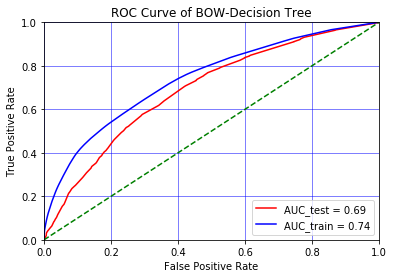

In [0]:
# train model on the best alpha
lr = DecisionTreeClassifier(max_depth=find_optimal(roc_auc_score_cv_bow_dict)['depth'],min_samples_split=find_optimal(roc_auc_score_cv_bow_dict)['sample'],class_weight="balanced")

# fitting the model on crossvalidation train
lr.fit(X_tr, y_train)

# predict the response on the crossvalidation train
pred_bow_test = lr.predict(X_te)
pred_bow_train = lr.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_bow_test_scores=lr.predict_proba(X_te)
pred_bow_train_scores=lr.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_bow_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_bow_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of BOW-Decision Tree')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# summary

- With  depth as 10 and sample split as 500 we achieve a test AUC of 0.69 with SET1

# C)  confusion matrix

##  train data

Training CM for BOW Decision Tree


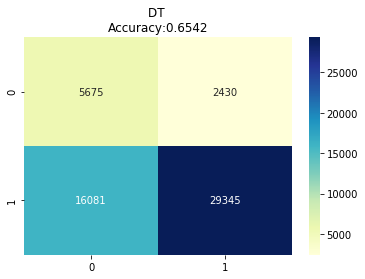

In [0]:
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for BOW Decision Tree")
cm =confusion_matrix(y_train, pred_bow_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d", cmap="YlGnBu")
plt.title('DT \nAccuracy:{0:.4f}'.format(accuracy_score(y_train, pred_bow_train)))
plt.show()
print("="*50)

# Summary

- The no of true positives are significantly high appt 29k while false negatives  are significantly high as well about 16k for training data

Testing CM for BOW


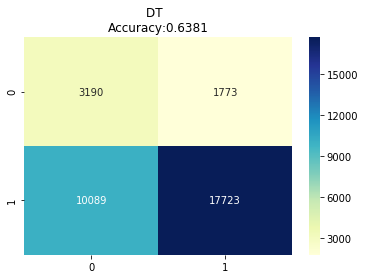

In [0]:
print("Testing CM for BOW")
cm =confusion_matrix(y_test, pred_bow_test, labels=None, sample_weight=None)
summary.append(['BoW',find_optimal(roc_auc_score_cv_bow_dict)['depth'],find_optimal(roc_auc_score_cv_bow_dict)['sample'],roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT  \nAccuracy:{0:.4f}'.format(accuracy_score(y_test, pred_bow_test)))
plt.show()

# Summary

- The number of true positives areare roughly 18k while false negatives are just 10k whereas true negatives are 1772

#  Using graphviz to visualize tree

## visualize DT BOW

In [0]:
from sklearn.tree import export_graphviz

# train model on the best alpha
lr = DecisionTreeClassifier(max_depth=2,min_samples_split=find_optimal(roc_auc_score_cv_bow_dict)['sample'])

# fitting the model on crossvalidation train
lr.fit(X_tr, y_train)

dot_data = export_graphviz(lr,
                            feature_names=feature_names_bow,
                            class_names=["+","-"],
                            out_file='Bow_tree.dot',
                            filled=True,
                            rounded=True)

# Procedure followed to obtain visualization of tree

- Code referred from here https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- The .dot file that was generated 

- Open the .dot file with a text editor

- pasted the code on http://webgraphviz.com/ and finally obtained the visualization of tree

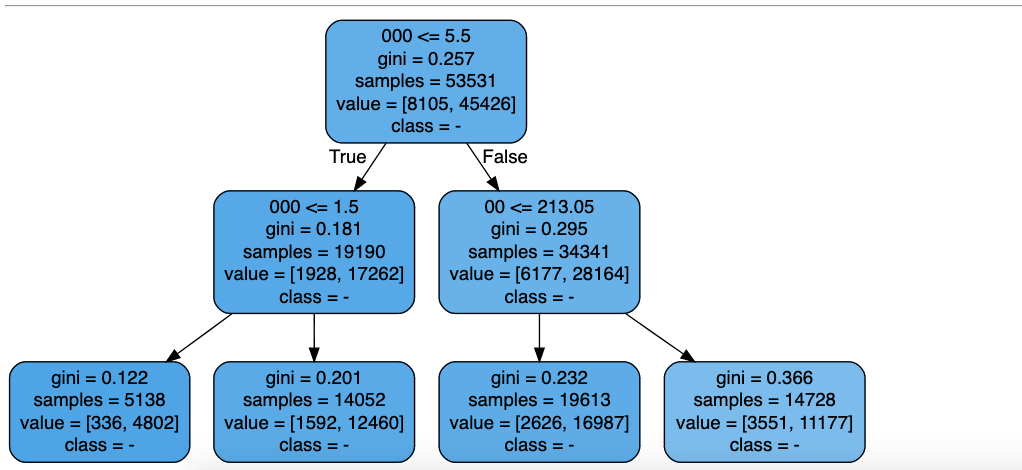

In [1]:
from IPython.display import Image
Image("/Users/user/Desktop/bow_tree.png")


# set2 Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (TFIDF)

# A) Simple Cross validation

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [0]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(53531, 8542) (53531,)
(22942, 8542) (22942,)
(32775, 8542) (32775,)


In [0]:

roc_auc_score_cv_tfidf_dict=[]
roc_auc_score_train_tfidf_dict=[]

depth=[1, 5, 10, 50, 100, 250]
min_samples_split=[5, 10, 100, 500]

for d in tqdm(depth):
    for s in min_samples_split:
        #create instance of model
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=s,class_weight="balanced")
        
        #Fit the model on the training set 
        dt.fit(X_tr,y_train)
        
        
        # predict the response on the crossvalidation train
        pred_tfidf_cv = dt.predict_proba(X_cr)

        #evaluate CV roc_auc
        roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_cv[:,1])

        #insert into dict
        roc_auc_score_cv_tfidf_dict.append([d,s,roc_auc_cv])

         # fitting the model on crossvalidation train
        dt.fit(X_tr, y_train)

        # predict the response on the train
        pred_tfidf_train = dt.predict_proba(X_tr)

        #evaluate train roc_auc
        roc_auc_train =roc_auc_score(y_train,pred_tfidf_train[:,1])

        #insert into dict
        roc_auc_score_train_tfidf_dict.append([d,s,roc_auc_train])

print(roc_auc_score_cv_tfidf_dict)


100%|██████████| 6/6 [39:47<00:00, 524.15s/it]


[[1, 5, 0.5651920681373825], [1, 10, 0.5651920681373825], [1, 100, 0.5651920681373825], [1, 500, 0.5651920681373825], [5, 5, 0.6557570109885535], [5, 10, 0.6557570109885535], [5, 100, 0.6556031263503257], [5, 500, 0.6557334052403017], [10, 5, 0.6676545225035453], [10, 10, 0.6671495827586039], [10, 100, 0.6683974714746748], [10, 500, 0.6764301386956366], [50, 5, 0.5738613438713297], [50, 10, 0.5735925577174961], [50, 100, 0.5991949914945376], [50, 500, 0.6250073929684471], [100, 5, 0.5596021264069853], [100, 10, 0.5619246274446624], [100, 100, 0.5881019088762818], [100, 500, 0.6199824662445932], [250, 5, 0.5566848166999232], [250, 10, 0.5592203830882476], [250, 100, 0.5693625599259238], [250, 500, 0.6111426569074752]]


In [0]:
x1=[]
y1=[]
z1=[]

x2=[]
y2=[]
z2=[]

for value in roc_auc_score_cv_tfidf_dict:
    x1.append(value[0])
    y1.append(value[1])
    z1.append(value[2])
    
for value in roc_auc_score_train_tfidf_dict:
    x2.append(value[0])
    y2.append(value[1])
    z2.append(value[2])
    
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'Cross val')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'train')
data = [trace1, trace2]

layout = go.Layout(title='Depth vs split size vs AUC(TFIDF)',scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [0]:
find_optimal(roc_auc_score_cv_tfidf_dict)

{'depth': 10, 'sample': 500}

<img src='https://github.com/Kunal-Varma/Decision-Trees/blob/master/set_2_AUC.png?raw=1' width=800px>

# Summary

- The optimal parameters are depth as 10 and sample as 500

# B) Training model using best hyperparameter value

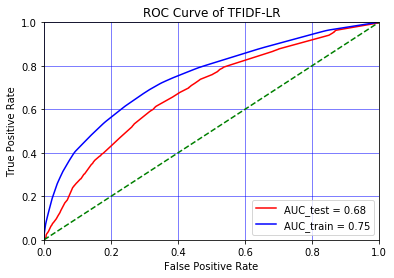

In [0]:
# train model on the best alpha
lr = DecisionTreeClassifier(max_depth=find_optimal(roc_auc_score_cv_tfidf_dict)['depth'],min_samples_split=find_optimal(roc_auc_score_cv_tfidf_dict)['sample'],class_weight="balanced")

# fitting the model on crossvalidation train
lr.fit(X_tr, y_train)

# predict the response on the crossvalidation train
pred_tfidf_test = lr.predict(X_te)
pred_tfidf_train = lr.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_test_scores=lr.predict_proba(X_te)
pred_tfidf_train_scores=lr.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We get Test AUC of 0.68

## C) confusion matrix

## train data

Training CM for TFIDF


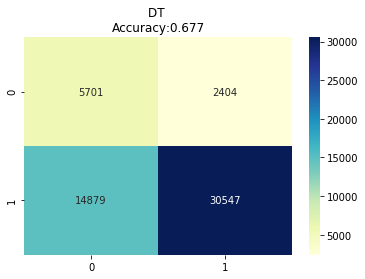

In [0]:

from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF")
cm =confusion_matrix(y_train, pred_tfidf_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_train)))
plt.show()
print("="*50)

# Summary

- we observe high no of true positives app 30k whereas false negatives are 15k and very few true negatives roughly 2400

## test data

Testing CM for TFIDF


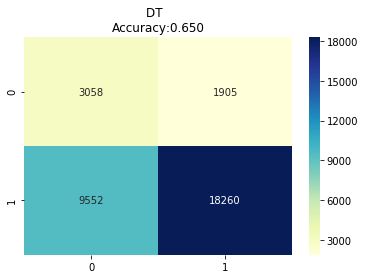

In [0]:
print("Testing CM for TFIDF")
cm =confusion_matrix(y_test, pred_tfidf_test, labels=None, sample_weight=None)
summary.append(['Tfidf',find_optimal(roc_auc_score_cv_tfidf_dict)['depth'],find_optimal(roc_auc_score_cv_tfidf_dict)['sample'],roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_test)))
plt.show()

# Summary

- We get about 18k true positives while the number of false positives is just 1905

## Graphviz

In [0]:

# train model on the best alpha
lr = DecisionTreeClassifier(max_depth=2,min_samples_split=find_optimal(roc_auc_score_cv_tfidf_dict)['sample'],class_weight="balanced")

# fitting the model on crossvalidation train
lr.fit(X_tr, y_train)

dot_data = export_graphviz(lr,
                            feature_names=feature_names_tfidf,
                            class_names=["+","-"],
                            out_file='Tfidf_tree.dot',
                            filled=True,
                            rounded=True)

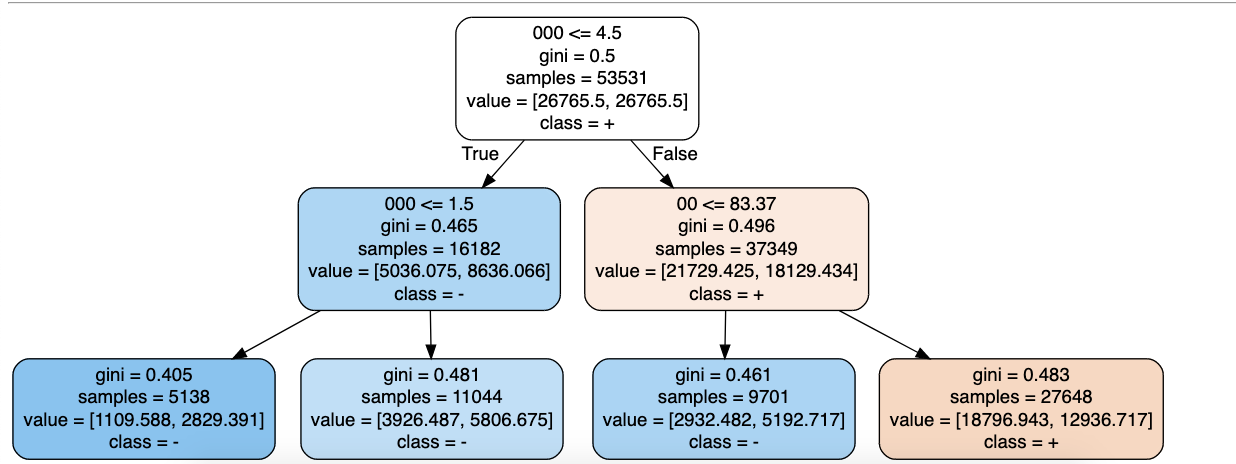

In [2]:
from IPython.display import Image
Image("/Users/user/Desktop/tfidf_Tree.png")


# set3 Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V

# A) Simple Cross validation

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [0]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(53531, 705) (53531,)
(22942, 705) (22942,)
(32775, 705) (32775,)


In [0]:
roc_auc_score_cv_w2v_dict=[]
roc_auc_score_train_w2v_dict=[]

depth=[1, 5, 10, 50, 100, 250]
min_samples_split=[5, 10, 100, 500]

for d in tqdm(depth):
    for s in min_samples_split:
        #create instance of model
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=s,class_weight="balanced")
        
        #Fit the model on the training set 
        dt.fit(X_tr,y_train)
        
        
        # predict the response on the crossvalidation train
        pred_w2v_cv = dt.predict_proba(X_cr)

        #evaluate CV roc_auc
        roc_auc_cv =roc_auc_score(y_cv,pred_w2v_cv[:,1])

        #insert into dict
        roc_auc_score_cv_w2v_dict.append([d,s,roc_auc_cv])

         # fitting the model on crossvalidation train
        dt.fit(X_tr, y_train)

        # predict the response on the train
        pred_w2v_train = dt.predict_proba(X_tr)

        #evaluate train roc_auc
        roc_auc_train =roc_auc_score(y_train,pred_w2v_train[:,1])

        #insert into dict
        roc_auc_score_train_w2v_dict.append([d,s,roc_auc_train])

print(roc_auc_score_cv_w2v_dict)


100%|██████████| 6/6 [1:41:54<00:00, 1225.00s/it]


[[1, 5, 0.5651920681373825], [1, 10, 0.5651920681373825], [1, 100, 0.5651920681373825], [1, 500, 0.5651920681373825], [5, 5, 0.6615597223508599], [5, 10, 0.6615597223508599], [5, 100, 0.661530660591894], [5, 500, 0.6620380400164231], [10, 5, 0.6247837926377625], [10, 10, 0.6259618843387238], [10, 100, 0.6356114824747021], [10, 500, 0.6532235663821733], [50, 5, 0.544251285400638], [50, 10, 0.5473974888037929], [50, 100, 0.5791541400209297], [50, 500, 0.6371925870646237], [100, 5, 0.5392403313871492], [100, 10, 0.5403407747405098], [100, 100, 0.5732601550701747], [100, 500, 0.6371165208122708], [250, 5, 0.5414034917758845], [250, 10, 0.5457520875672864], [250, 100, 0.5729881234031927], [250, 500, 0.6386586644584757]]


In [0]:
x1=[]
y1=[]
z1=[]

x2=[]
y2=[]
z2=[]

for value in roc_auc_score_cv_w2v_dict:
    x1.append(value[0])
    y1.append(value[1])
    z1.append(value[2])
    
for value in roc_auc_score_train_w2v_dict:
    x2.append(value[0])
    y2.append(value[1])
    z2.append(value[2])
    
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'Cross val')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'train')
data = [trace1, trace2]

layout = go.Layout(title='Depth vs split size vs AUC(W2V)',scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [0]:

find_optimal(roc_auc_score_cv_w2v_dict)

{'depth': 5, 'sample': 500}

<img src='https://github.com/Kunal-Varma/Decision-Trees/blob/master/set_3_AUC.png?raw=1' width=800px>

# Summary

- We obtain best parameters as depth as 5 and sample per split as 500

 # B) training model using best hyperparameter value

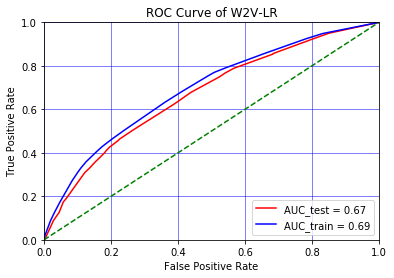

In [0]:

# train model on the best alpha
lr = DecisionTreeClassifier(max_depth=find_optimal(roc_auc_score_cv_w2v_dict)['depth'],min_samples_split=find_optimal(roc_auc_score_cv_w2v_dict)['sample'],class_weight="balanced")

# fitting the model on crossvalidation train
lr.fit(X_tr, y_train)

# predict the response on the crossvalidation train
pred_w2v_test = lr.predict(X_te)
pred_w2v_train = lr.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_w2v_test_scores=lr.predict_proba(X_te)
pred_w2v_train_scores=lr.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of W2V-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We get Test AUC of 0.66

# confusion matrix

## train data

Training CM for W2V


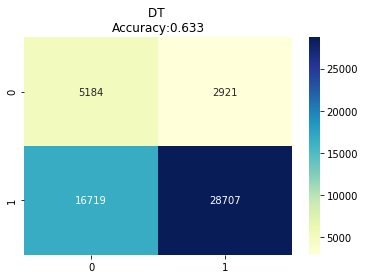

In [0]:

from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for W2V")
cm =confusion_matrix(y_train, pred_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_w2v_train)))
plt.show()
print("="*50)


# Summary

- We get a vast majority as true positives appx 28k while very few true negatives 5296

## test data

Testing CM for W2V


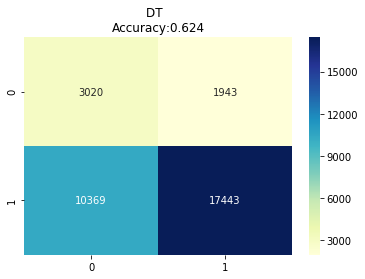

In [0]:
print("Testing CM for W2V")
cm =confusion_matrix(y_test, pred_w2v_test, labels=None, sample_weight=None)
summary.append(['W2v',find_optimal(roc_auc_score_cv_w2v_dict)['depth'],find_optimal(roc_auc_score_cv_w2v_dict)['sample'],roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_w2v_test)))
plt.show()

# Summary

- For test data we get app 17k true positives while small no of true negatives 3k roughly

# set4 Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

# A) Simple cross validation

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()


In [0]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(53531, 705) (53531,)
(22942, 705) (22942,)
(32775, 705) (32775,)


In [0]:

roc_auc_score_cv_tfidf_w2v_dict=[]
roc_auc_score_train_tfidf_w2v_dict=[]

depth=[1, 5, 10, 50, 100, 250]
min_samples_split=[5, 10, 100, 500]

for d in tqdm(depth):
    for s in min_samples_split:
        #create instance of model
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=s,class_weight="balanced")
        
        #Fit the model on the training set 
        dt.fit(X_tr,y_train)
        
        
        # predict the response on the crossvalidation train
        pred_tfidf_w2v_cv = dt.predict_proba(X_cr)

        #evaluate CV roc_auc
        roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_w2v_cv[:,1])

        #insert into dict
        roc_auc_score_cv_tfidf_w2v_dict.append([d,s,roc_auc_cv])

         # fitting the model on crossvalidation train
        dt.fit(X_tr, y_train)

        # predict the response on the train
        pred_tfidf_w2v_train = dt.predict_proba(X_tr)

        #evaluate train roc_auc
        roc_auc_train =roc_auc_score(y_train,pred_tfidf_w2v_train[:,1])

        #insert into dict
        roc_auc_score_train_tfidf_w2v_dict.append([d,s,roc_auc_train])

print(roc_auc_score_cv_tfidf_w2v_dict)


 67%|██████▋   | 4/6 [43:40<22:53, 686.70s/it]

In [0]:

x1=[]
y1=[]
z1=[]

x2=[]
y2=[]
z2=[]

for value in roc_auc_score_cv_tfidf_w2v_dict:
    x1.append(value[0])
    y1.append(value[1])
    z1.append(value[2])
    
for value in roc_auc_score_train_tfidf_w2v_dict:
    x2.append(value[0])
    y2.append(value[1])
    z2.append(value[2])
    
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'Cross val')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'train')
data = [trace1, trace2]

layout = go.Layout(title='Depth vs split size vs AUC(TFIDF_W2V)',scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [0]:
find_optimal(roc_auc_score_cv_tfidf_w2v_dict)

<img src='https://github.com/Kunal-Varma/Decision-Trees/blob/master/set_4_AUC.png?raw=1' width=800px>

# Summary

- We get best parameters as depth =10 and sample split as 500

# B) training the model using best hyperparameter value

In [0]:

# train model on the best alpha
lr = DecisionTreeClassifier(max_depth=find_optimal(roc_auc_score_cv_tfidf_w2v_dict)['depth'],min_samples_split=find_optimal(roc_auc_score_cv_tfidf_w2v_dict)['sample'],class_weight="balanced")

# fitting the model on crossvalidation train
lr.fit(X_tr, y_train)

# predict the response on the crossvalidation train
pred_tfidf_w2v_test = lr.predict(X_te)
pred_tfidf_w2v_train = lr.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_w2v_test_scores=lr.predict_proba(X_te)
pred_tfidf_w2v_train_scores=lr.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF_W2V-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

- We obtain a test AUC of 0.66

# C) Confusion matrix

## train data

In [0]:
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF_W2V")
cm =confusion_matrix(y_train, pred_tfidf_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_w2v_train)))
plt.show()
print("="*50)

# Summary

- We obtain a large no of true positives 29k while false positives(2k) are lesser than true postives.

## test data

In [0]:
print("Testing CM for TFIDF_W2V")
cm =confusion_matrix(y_test, pred_tfidf_w2v_test, labels=None, sample_weight=None)
summary.append(['Tfidf_w2v',find_optimal(roc_auc_score_cv_tfidf_w2v_dict)['depth'],find_optimal(roc_auc_score_cv_tfidf_w2v_dict)['sample'],roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_w2v_test)))
plt.show()

# Summary

- we observe nearly 17k as true positives
- nearly 10k are false negatives for test data

# Preparing set 5

In [0]:
# select 5k best features from set2

In [0]:



# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_tf = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).toarray()
X_te_tf = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).toarray()
X_cr_tf = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).toarray()




In [0]:
print("Final Data matrix")
print(X_tr_tf.shape, y_train.shape)
print(X_cr_tf.shape, y_cv.shape)
print(X_te_tf.shape, y_test.shape)
print("="*100)

In [0]:

print(len(feature_names_tfidf))

In [0]:

DT = DecisionTreeClassifier(random_state=0)
tfidf_pd_train = pd.DataFrame(X_tr_tf, columns=feature_names_tfidf)
tfidf_pd_test = pd.DataFrame(X_te_tf, columns=feature_names_tfidf)
tfidf_pd_cv = pd.DataFrame(X_cr_tf, columns=feature_names_tfidf)
DT = DT.fit(tfidf_pd_train, y_train)

temp=dict(zip(tfidf_pd_train.columns, DT.feature_importances_))

In [0]:
temp = {k:v for k,v in temp.items() if v != 0}
print(len(temp))

In [0]:
imp_features_train=[]
temp=Counter(temp)
for k, v in temp.most_common(5000):
    imp_features_train.append(k)

In [0]:
imp_tfidf_df_train=tfidf_pd_train[imp_features_train]
imp_tfidf_df_test=tfidf_pd_test[imp_features_train]
imp_tfidf_df_cv=tfidf_pd_cv[imp_features_train]
print(imp_tfidf_df_train.shape)
print(imp_tfidf_df_test.shape)
print(imp_tfidf_df_cv.shape)

In [0]:
# applying DT on imp features

In [0]:
depth=[1, 5, 10, 50, 100, 250]
min_samples_split=[5, 10, 100, 500]


roc_auc_score_cv_imp_tfidf_dict=[]
roc_auc_score_train_imp_tfidf_dict=[]
for d in tqdm(depth):
    for s in min_samples_split:
        #create instance of model
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=s,class_weight="balanced")
        
        #Fit the model on the training set 
        dt.fit(imp_tfidf_df_train,y_train)
        
        
        # predict the response on the crossvalidation train
        pred_imp_tfidf_cv = dt.predict_proba(imp_tfidf_df_cv)

        #evaluate CV roc_auc
        roc_auc_cv =roc_auc_score(y_cv,pred_imp_tfidf_cv[:,1])

        #insert into dict
        roc_auc_score_cv_imp_tfidf_dict.append([d,s,roc_auc_cv])

         # fitting the model on crossvalidation train
        dt.fit(imp_tfidf_df_train, y_train)

        # predict the response on the train
        pred_imp_tfidf_train = dt.predict_proba(imp_tfidf_df_train)

        #evaluate train roc_auc
        roc_auc_train =roc_auc_score(y_train,pred_imp_tfidf_train[:,1])

        #insert into dict
        roc_auc_score_train_imp_tfidf_dict.append([d,s,roc_auc_train])

print(roc_auc_score_cv_imp_tfidf_dict)

In [0]:
x1=[]
y1=[]
z1=[]

x2=[]
y2=[]
z2=[]

for value in roc_auc_score_cv_imp_tfidf_dict:
    x1.append(value[0])
    y1.append(value[1])
    z1.append(value[2])
    
for value in roc_auc_score_train_imp_tfidf_dict:
    x2.append(value[0])
    y2.append(value[1])
    z2.append(value[2])
    
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'Cross val')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'train')
data = [trace1, trace2]

layout = go.Layout(title='Depth vs split size vs AUC(IMP_TFIDF)',scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

## Finding the optimal parameters

In [0]:
find_optimal(roc_auc_score_cv_imp_tfidf_dict)

<img src='https://github.com/Kunal-Varma/Decision-Trees/blob/master/set_5_AUC.png?raw=1' width=800px>

# B) training the model with the best parameters

In [0]:

# train model on the best alpha
lr = DecisionTreeClassifier(max_depth=find_optimal(roc_auc_score_cv_imp_tfidf_dict)['depth'],min_samples_split=find_optimal(roc_auc_score_cv_imp_tfidf_dict)['sample'],class_weight="balanced")

# fitting the model on crossvalidation train
lr.fit(imp_tfidf_df_train, y_train)

# predict the response on the crossvalidation train
pred_imp_tfidf_test = lr.predict(imp_tfidf_df_test)
pred_imp_tfidf_train = lr.predict(imp_tfidf_df_train)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_imp_tfidf_test_scores=lr.predict_proba(imp_tfidf_df_test)
pred_imp_tfidf_train_scores=lr.predict_proba(imp_tfidf_df_train)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_imp_tfidf_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_imp_tfidf_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of IMP_TFIDF-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# summary

- We obtain test AUC of 0.63

#  C) Confusion Matrix

## train data

In [0]:
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for IMP_TFIDF")
cm =confusion_matrix(y_train, pred_imp_tfidf_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_imp_tfidf_train)))
plt.show()


# summary

- We find that for training data there are 26k true positives nearly 50% of data whereas false positives are just 2400

## test data

In [0]:
print("="*50)
print("Testing CM for IMP_TFIDF")
cm =confusion_matrix(y_test, pred_imp_tfidf_test, labels=None, sample_weight=None)
summary.append(['Imp_tfidf',find_optimal(roc_auc_score_cv_imp_tfidf_dict)['depth'],find_optimal(roc_auc_score_cv_imp_tfidf_dict)['sample'],roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")
plt.title('DT  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_imp_tfidf_test)))
plt.show()

# Summary

- We find that nearly 15k are true positives whereas large number are false negatives too(12k)

# False positive analysis

# set1

In [0]:

y_test=y_test.values
X_test_price=X_test['price'].values
X_test_essay= X_test["clean_essays"].values  

In [0]:
fpr=[]
essay=''
price_box=[]
X_test_prev=[]
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(pred_bow_test[i]) == 1)):
        fpr.append(1)
        essay+=X_test_essay[i]
        price_box.append(X_test_price[i])
        X_test_prev.append(prev_projects_test[i])
    else :
        fpr.append(0)

## word cloud

In [0]:
# code snippet taken from https://www.geeksforgeeks.org/generating-word-cloud-python/

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# summary

- From wordcloud of essays it is very clear that false positive points have words related to Student,School,Classroom,Learning  etc in their project essays 

# Box plot of False positive points

In [0]:
# Code snippet taken from https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.set(context='notebook', style='whitegrid')
plt.xlabel("False Positive")
plt.ylabel("Price")
sns.boxplot(data=price_box)
plt.show()

# Summary

- We find that majority of false positive points have very less price,There are a few number of outliers beyond 2000 dollars

# PDF of Previously posted projects

In [0]:
count,bin_edges=np.histogram(X_test_prev,bins=10,density=True)

#pdf
pdf=count/(sum(count))

p=plt.plot(bin_edges[1:],pdf,label='pdf')

plt.ylabel('PDF')
plt.xlabel('Previoulsy posted project count')
plt.legend()
plt.title('Unvariate analysis(Previoulsy posted project count) of False positive')
plt.show()

# summary

- we observe that for false positives nearly 90% of the points have lesser than 25 projects previously posted

# false positive analysis of set2 

In [0]:
fpr=[]
essay=''
price_tfidf=[]
X_test_prev=[]
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(pred_tfidf_test[i]) == 1)):  
        fpr.append(1)
        essay+=X_test_essay[i]
        price_tfidf.append(X_test_price[i])
        X_test_prev.append(prev_projects_test[i])
    else :
        fpr.append(0)

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# summary

- most used words are children,school,class,learning.

In [0]:
# Code snippet taken from https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.set(context='notebook', style='whitegrid')
plt.xlabel("False Positive")
plt.ylabel("Price")
sns.boxplot(data=price_tfidf)
plt.show()

# Summary

- A very small minority of points have price more than 2000 dollars

In [0]:
count,bin_edges=np.histogram(X_test_prev,bins=10,density=True)

#pdf
pdf=count/(sum(count))

p=plt.plot(bin_edges[1:],pdf,label='pdf')

plt.ylabel('PDF')
plt.xlabel('Previoulsy posted project count')
plt.legend()
plt.title('Unvariate analysis(Previoulsy posted project count) of False positive')

# summary

- More than 90 % points have about 75 prev projects posted

# set3

In [0]:
fpr=[]
essay=''
price_w2v=[]
X_test_prev=[]
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(pred_w2v_test[i]) == 1)):  
        fpr.append(1)
        essay+=X_test_essay[i]
        price_w2v.append(X_test_price[i])
        X_test_prev.append(prev_projects_test[i])
    else :
        fpr.append(0)

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Summary

- frequently used words are school, daily,work,material.

In [0]:
 from sklearn.datasets import load_iris
 from sklearn import tree

clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
 tree.export_graphviz(clf,
...     out_file='tree.dot')

In [0]:
# Code snippet taken from https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.set(context='notebook', style='whitegrid')
plt.xlabel("False Positive")
plt.ylabel("Price")
sns.boxplot(data=price_w2v)
plt.show()

# Summary

- vast majority points have very less price less than 2000 dollars

In [0]:
count,bin_edges=np.histogram(X_test_prev,bins=10,density=True)

#pdf
pdf=count/(sum(count))

p=plt.plot(bin_edges[1:],pdf,label='pdf')

plt.ylabel('PDF')
plt.xlabel('Previoulsy posted project count')
plt.legend()
plt.title('Unvariate analysis(Previoulsy posted project count) of False positive')

# summary

- For this set we find more than 80 % have prev projects less than 100 but more than 50 which is unique

# Set 4 false positive anaysis

In [0]:
fpr=[]
essay=''
price_tfidf_w2v=[]
X_test_prev=[]
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(pred_tfidf_w2v_test[i]) == 1)):  
        fpr.append(1)
        essay+=X_test_essay[i]
        price_tfidf_w2v.append(X_test_price[i])
        X_test_prev.append(prev_projects_test[i])
    else :
        fpr.append(0)

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# summary

- major words used are project,teacher help time

In [0]:
# Code snippet taken from https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.set(context='notebook', style='whitegrid')
plt.xlabel("False Positive")
plt.ylabel("Price")
sns.boxplot(data=price_tfidf_w2v)
plt.show()

# Summary

- a large majority have prices less than 500 dollars for this set

In [0]:
count,bin_edges=np.histogram(X_test_prev,bins=10,density=True)

#pdf
pdf=count/(sum(count))

p=plt.plot(bin_edges[1:],pdf,label='pdf')

plt.ylabel('PDF')
plt.xlabel('Previoulsy posted project count')
plt.legend()
plt.title('Unvariate analysis(Previoulsy posted project count) of False positive')

# Summary

- More than 90% points have less than 40 prev projects posted

# Set 5 False +ve points



In [0]:
fpr=[]
essay=''
price_imp_tfidf=[]
X_test_prev=[]
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(pred_imp_tfidf_test[i]) == 1)):  
        fpr.append(1)
        essay+=X_test_essay[i]
        price_imp_tfidf.append(X_test_price[i])
        X_test_prev.append(prev_projects_test[i])
    else :
        fpr.append(0)

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# summary

- Majority used words are want,student skill many for false positive points

In [0]:
# Code snippet taken from https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.set(context='notebook', style='whitegrid')
plt.xlabel("False Positive")
plt.ylabel("Price")
sns.boxplot(data=price_imp_tfidf)
plt.show()

# Summary

- Large majority have very less price for this set

In [0]:
count,bin_edges=np.histogram(X_test_prev,bins=10,density=True)

#pdf
pdf=count/(sum(count))

p=plt.plot(bin_edges[1:],pdf,label='pdf')

plt.ylabel('PDF')
plt.xlabel('Previoulsy posted project count')
plt.legend()
plt.title('Unvariate analysis(Previoulsy posted project count) of False positive')

# Summary

- Majority of prev posted projects are less than 50 for false +ve points

# Conclusions

In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer Used", "Depth of Tree","Min_sample_split", "Test_AUC"]

x.add_row(["BOW", 10, 500, 0.69])
x.add_row(["TFIDF", 10, 500, 0.68])
x.add_row(["Avg_W2V", 5, 500, 0.66])
x.add_row(["TFIDF_W2v", 10, 500, 0.66])
x.add_row(["Imp_TFIDF", 10, 500, 0.63])

print(x)

# Final RESULTS

- We find that BOW model performs best with an AUC of 0.69 followed by TFIDF with 0.68

- Both the W2v models give same AUC of 0.66.

- When we reduce the important features of Tfidf model,The AUC drops from 0.68 to 0.63,so it implies features need to be retained for better performance